In [4]:
import pandas as pd
from hicmatrix import HiCMatrix as hm
from hicmatrix.lib import MatrixFileHandler
import numpy as np

In [1092]:
jac_sim_path = '/grid/gillis/data/lohia/hi_c_data_processing/data_human/aggregates/500kbp_raw/chr11_intra_KR.h5'
#exp_file_path = '/grid/gillis/data/lohia/hi_c_data_processing/software/CoCoCoNet/networks/human_prioAggNet.h5'
hic_file_whole_chr11 = hm.hiCMatrix(jac_sim_path)

In [463]:
jac_sim_path = '/grid/gillis/data/lohia/hi_c_data_processing/data_human/aggregates/1kbp_raw/chr10_intra_KR.h5'
#exp_file_path = '/grid/gillis/data/lohia/hi_c_data_processing/software/CoCoCoNet/networks/human_prioAggNet.h5'
hic_file_whole = hm.hiCMatrix(jac_sim_path)

In [464]:
jac_sim_path = '/grid/gillis/data/lohia/hi_c_data_processing/data_human/aggregates/1kbp_raw/max/hic_gene_intra_KR_chr10.h5'
#exp_file_path = '/grid/gillis/data/lohia/hi_c_data_processing/software/CoCoCoNet/networks/human_prioAggNet.h5'
hic_file = hm.hiCMatrix(jac_sim_path)

In [1090]:
hic_file_whole.getChrBinRange('chr10')

(0, 133798)

In [1091]:
hic_file_whole.cut_intervals[-1]

('chr10', 133797000, 133797422, 1)

In [1093]:
hic_file_whole_chr11.cut_intervals[-1]

('chr11', 135000000, 135086622, 1)

In [554]:
df_unique_variants   = pd.read_csv(f'/grid/gillis/data/lohia/eQTL/GTEx_Analysis_v8_eQTL_all_associations/chr10_all_association_all.csv.gz', sep='\t' )

df_unique_variants['tss_distance_abs'] = df_unique_variants['tss_distance'].abs()



In [555]:
df_unique_variants_all = df_unique_variants[df_unique_variants['tss_distance_abs'] > 0]

df_unique_variants_all['gene_id'] = [x.split('.')[0] for x in df_unique_variants_all['gene_id']]

<ipython-input-555-25d550321c10>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_unique_variants_all['gene_id'] = [x.split('.')[0] for x in df_unique_variants_all['gene_id']]


In [652]:
import pyranges as pr
chr_list=['chr' + str(x) for x in range(1,23)]
genome_info_file='/grid/gillis/data//lohia/hi_c_data_processing/genomes_jlee/gencode.v28.chr_patch_hapl_scaff.annotation.gtf.gz'
species='human'
from scipy.sparse import csr_matrix, dia_matrix, triu, tril, coo_matrix
import scipy.sparse as ss



In [653]:
    # as PyRanges-object
    gr = pr.read_gtf(genome_info_file)
    df = gr.df
    gene_data = df[df['Feature'] == 'gene']
    gene_data['gene_id'] = [x.split('.')[0] for x in gene_data['gene_id']]
    gene_data['gene_id'].drop_duplicates(inplace=True)

<ipython-input-653-24ea02d20f62>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gene_data['gene_id'] = [x.split('.')[0] for x in gene_data['gene_id']]
<ipython-input-653-24ea02d20f62>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gene_data['gene_id'].drop_duplicates(inplace=True)


In [1305]:
var_int = 'chr10_100367735_A_G_b38'
var_int ='chr10_9843885_T_G_b38'
#var_int ='chr10_94997876_C_G_b38'
#var_int ='chr10_106408378_C_G_b38'
var_int ='chr10_111569056_C_T_b38'
#var_int ='chr10_39360667_G_A_b38'
#var_int = 'chr10_64613980_C_T_b38'

#var_int ='chr10_39254350_G_A_b38'
#var_int ='chr10_39254515_T_C_b38'
#chr6_115009060_A_G_b38

In [1306]:
gene_data[gene_data['gene_id'] ==gene_x]['Strand'].values[0]

'-'

In [1307]:
df_unique_variants_all[df_unique_variants_all['variant_id']==var_int]['tss_distance'].tolist()

[699313,
 697261,
 696823,
 661573,
 658460,
 649782,
 649509,
 631823,
 491893,
 -646321,
 -804962,
 -850951,
 -877861,
 -877942,
 924659,
 -714679,
 464100,
 -787518]

In [1283]:
(start, end) = hic_file.getChrBinRange('chr10')
all_gene_list = [x[3].decode() for x in hic_file.cut_intervals[start : end]]
entire_matrix_KR = hic_file.matrix[start : end, :][:, start : end]

all_non_gene_index_list = [x[1] for x in hic_file.cut_intervals[start : end] if x[3].decode() == 'non-gene']
all_bins = [x[1] for x in hic_file.cut_intervals[start : end]]


bin_start = int(int(var_int.split('_')[1]) / int(1000))
variant_bins = [all_bins.index(bin_start)]



In [1220]:
df_unique_variants_all[df_unique_variants_all['variant_id']==var_int]['gene_id'].shape[0]

5

In [1067]:
df_unique_variants_all.columns

Index(['gene_id', 'variant_id', 'tss_distance', 'ma_samples', 'ma_count',
       'maf', 'pval_nominal', 'slope', 'slope_se', 'prediction', 'chr_var',
       'tss_distance_abs'],
      dtype='object')

In [1221]:
 df_unique_variants_all[df_unique_variants_all['variant_id']==var_int].sort_values(['tss_distance_abs'])

gene_id              variant_id  tss_distance  ma_samples  \
10216808  ENSG00000237592  chr10_41547230_C_A_b38       -638109           6   
11007541  ENSG00000274167  chr10_41547230_C_A_b38       -695491          16   
6354182   ENSG00000215146  chr10_41547230_C_A_b38       -820744          33   
8281676   ENSG00000182632  chr10_41547230_C_A_b38       -928119          22   
6360979   ENSG00000185904  chr10_41547230_C_A_b38       -928313          33   

          ma_count       maf  pval_nominal     slope  slope_se  prediction  \
10216808         6  0.020833  9.064020e-01 -0.034624  0.293845           0   
11007541        18  0.027950  2.798340e-01 -0.158266  0.146151           0   
6354182         36  0.030981  4.112950e-04  0.492726  0.138555           0   
8281676         24  0.031008  2.122210e-07  1.034330  0.194983           0   
6360979         36  0.030981  7.354650e-05  0.512075  0.128109           0   

         chr_var  tss_distance_abs  
10216808   chr10            638109  
11007541   chr10            695491  
6354182    chr10            820744  
8281676    chr10            928119  
6360979    chr10            928313

In [1120]:
df_unique_variants_all[df_unique_variants_all['variant_id']==var_int]


gene_id               variant_id  tss_distance  ma_samples  \
4761156  ENSG00000232470  chr10_111569056_C_T_b38        699313          58   
4768817  ENSG00000150593  chr10_111569056_C_T_b38        697261          58   
4776480  ENSG00000203497  chr10_111569056_C_T_b38        696823          58   
4784058  ENSG00000278601  chr10_111569056_C_T_b38        661573          58   
4791758  ENSG00000270589  chr10_111569056_C_T_b38        658460          58   
4799462  ENSG00000214413  chr10_111569056_C_T_b38        649782          58   
4807206  ENSG00000108061  chr10_111569056_C_T_b38        649509          58   
4814909  ENSG00000234118  chr10_111569056_C_T_b38        631823          58   
4822320  ENSG00000150594  chr10_111569056_C_T_b38        491893          58   
4826279  ENSG00000119927  chr10_111569056_C_T_b38       -646321          58   
4832827  ENSG00000197142  chr10_111569056_C_T_b38       -804962          58   
4839570  ENSG00000232934  chr10_111569056_C_T_b38       -850951          58   
4846265  ENSG00000023041  chr10_111569056_C_T_b38       -877861          58   
4853061  ENSG00000151532  chr10_111569056_C_T_b38       -877942          58   
7256731  ENSG00000203867  chr10_111569056_C_T_b38        924659          42   
8701797  ENSG00000119913  chr10_111569056_C_T_b38       -714679          11   
9809257  ENSG00000213247  chr10_111569056_C_T_b38        464100          34   
9812719  ENSG00000243316  chr10_111569056_C_T_b38       -787518          34   

         ma_count       maf  pval_nominal     slope  slope_se  prediction  \
4761156        59  0.044030      0.269003  0.103232  0.093306           0   
4768817        59  0.044030      0.735195  0.016156  0.047746           0   
4776480        59  0.044030      0.302787  0.058237  0.056466           0   
4784058        59  0.044030      0.705505  0.035314  0.093403           0   
4791758        59  0.044030      0.865926  0.012825  0.075928           0   
4799462        59  0.044030      0.530115 -0.027927  0.044456           0   
4807206        59  0.044030      0.325670  0.022428  0.022800           0   
4814909        59  0.044030      0.124378 -0.171077  0.111174           0   
4822320        59  0.044030      0.729151  0.033423  0.096481           0   
4826279        59  0.044030      0.226796  0.101124  0.083581           0   
4832827        59  0.044030      0.655295 -0.028976  0.064874           0   
4839570        59  0.044030      0.002413 -0.313052  0.102742           0   
4846265        59  0.044030      0.731257  0.016239  0.047258           0   
4853061        59  0.044030      0.445871  0.045888  0.060156           0   
7256731        43  0.037005      0.189954  0.141347  0.107696           0   
8701797        11  0.042636      0.208095 -0.347868  0.274628           0   
9809257        34  0.046196      0.727943 -0.030313  0.087059           0   
9812719        34  0.046196      0.933073 -0.006756  0.080385           0   

        chr_var  tss_distance_abs  
4761156   chr10            699313  
4768817   chr10            697261  
4776480   chr10            696823  
4784058   chr10            661573  
4791758   chr10            658460  
4799462   chr10            649782  
4807206   chr10            649509  
4814909   chr10            631823  
4822320   chr10            491893  
4826279   chr10            646321  
4832827   chr10            804962  
4839570   chr10            850951  
4846265   chr10            877861  
4853061   chr10            877942  
7256731   chr10            924659  
8701797   chr10            714679  
9809257   chr10            464100  
9812719   chr10            787518

In [1308]:
(start, end) = hic_file.getChrBinRange('chr10')
all_gene_list = [x[3].decode() for x in hic_file.cut_intervals[start : end]]
entire_matrix_KR = hic_file.matrix[start : end, :][:, start : end]

all_non_gene_index_list = [x[1] for x in hic_file.cut_intervals[start : end] if x[3].decode() == 'non-gene']
all_bins = [x[1] for x in hic_file.cut_intervals[start : end]]


bin_start = int(int(var_int.split('_')[1]) / int(1000))
variant_bins = [all_bins.index(bin_start)]


gene_bins=[]
gene_bins_original = []
gene_start = []
gene_end = []
gene_bins_original_per_gene = []
gene_index_list_y = []
hic_feq_list_c = []
gene_val = []
tss_dist_l = []
given_gene_id_l = []
gene_type_l = []
gene_id_ensg = []

full_shape = df_unique_variants_all[df_unique_variants_all['variant_id']==var_int]['gene_id'].shape[0]
counter = 0
#df_test = df_unique_variants_all[df_unique_variants_all['variant_id']==var_int].drop_duplicates(['gene_bin'], keep='last', inplace=True)
for gene_x, tss in zip(df_unique_variants_all[df_unique_variants_all['variant_id']==var_int].sort_values(['tss_distance_abs'])['gene_id'], df_unique_variants_all[df_unique_variants_all['variant_id']==var_int].sort_values(['tss_distance_abs'])['tss_distance_abs']):
                                                        
                                                gene_bins.append(all_gene_list.index(gene_x))
                                                tss_dist_l.append(tss)
                
                                                
                                                given_gene_id_l.append(gene_data[gene_data['gene_id'] ==gene_x]['gene_name'].values[0])
                                                gene_type_l.append(gene_data[gene_data['gene_id'] ==gene_x]['gene_type'].values[0])
                                                gene_id_ensg.append(gene_data[gene_data['gene_id'] ==gene_x]['gene_id'].values[0])
                                                
                 
                                                g_s = [x[1] for x in hic_file.cut_intervals[start : end] if x[3].decode() == gene_x][0]
                                                g_e = [x[2] for x in hic_file.cut_intervals[start : end] if x[3].decode() == gene_x][0]     
                                                gene_bins_original.extend(list(range(g_s, g_e)))
                                                gene_bins_original_per_gene.extend(list(range(g_s, g_e+1)))
                                                if gene_data[gene_data['gene_id'] ==gene_x]['Strand'].values[0] == '+':
                                                    gene_start.append(g_s)
                                                    gene_end.append(g_e)
                                                else:
                                                    gene_start.append(g_e)
                                                    gene_end.append(g_s)
                                                counter = counter + 1
                                                #hic_feq_list = hic_file_whole.matrix[bin_start, :][:, g_s : g_e].toarray().tolist()[0]
                                                #hic_feq_list_c.extend(hic_feq_list)
                                                
                                                _x = all_gene_list.index(gene_x)
                                                gene_index_list = [entire_matrix_KR[variant_bins,:][:, [_x]].toarray().tolist()[0][0]  for i in list(range(g_s,g_e))]
                                                
                                                

                                                hic_feq_list_c.extend(gene_index_list)
                                                
                                                #hic_feq_list_c.append(entire_matrix_KR[variant_bins,:][:, [_x]].toarray().tolist()[0][0] + 1)
                                                
                                                gene_index_list = [counter for i in list(range(g_s,g_e))]
                                                gene_val.append(counter)
                                                
                                                
                                                
                                                
                                                gene_index_list_y.extend(gene_index_list)

gene_start.append(bin_start)
gene_bins_original.append(bin_start)
hic_feq_list_c.append(1)
#gene_bins_original.append(bin_start+1000)
#gene_bins_original.append(bin_start-1000)
#hic_feq_list_c.append(1)
#hic_feq_list_c.append(1)

gene_index_list_y.append(1)
gene_val.append(1)
pd.DataFrame(entire_matrix_KR[variant_bins,:][:, gene_bins].toarray() )


0          1         2         3          4          5          6   \
0  23.022551  26.023302  10.22965  18.35881  14.949623  13.167064  10.688541   

          7         8         9         10         11         12         13  \
0  10.258771  9.587108  9.587108  9.587108  17.838501  14.672468  10.628171   

         14        15        16         17  
0  9.918739  9.656475  9.876657  59.592781

In [1462]:
gene_bins

[1854,
 1853,
 1851,
 1858,
 1850,
 1847,
 1849,
 1848,
 1844,
 1845,
 1843,
 1859,
 1862,
 1863,
 1864,
 1865,
 1866,
 1840]

In [1438]:
pd.DataFrame(entire_matrix_KR[variant_bins,:][:, gene_bins].toarray() )

0          1         2         3          4          5          6   \
0  23.022551  26.023302  10.22965  18.35881  14.949623  13.167064  10.688541   

          7         8         9         10         11         12         13  \
0  10.258771  9.587108  9.587108  9.587108  17.838501  14.672468  10.628171   

         14        15        16         17  
0  9.918739  9.656475  9.876657  59.592781

In [1440]:
given_gene_id_l

['RP11-479A21.1',
 'ADRA2A',
 'RPL13AP6',
 'GPAM',
 'SHOC2',
 'BBIP1',
 'RP11-348N5.7',
 'RP11-348N5.9',
 'RP11-313D6.4',
 'PDCD4',
 'RP11-313D6.3',
 'TECTB',
 'GUCY2GP',
 'ACSL5',
 'RP11-324O2.3',
 'ZDHHC6',
 'VTI1A',
 'RBM20']

In [1439]:
hic_feq_list_c

[23.022550582885742,
 23.022550582885742,
 26.02330207824707,
 26.02330207824707,
 26.02330207824707,
 26.02330207824707,
 10.229649543762207,
 10.229649543762207,
 18.358810424804688,
 18.358810424804688,
 18.358810424804688,
 18.358810424804688,
 18.358810424804688,
 18.358810424804688,
 18.358810424804688,
 18.358810424804688,
 18.358810424804688,
 18.358810424804688,
 18.358810424804688,
 18.358810424804688,
 18.358810424804688,
 18.358810424804688,
 18.358810424804688,
 18.358810424804688,
 18.358810424804688,
 18.358810424804688,
 18.358810424804688,
 18.358810424804688,
 18.358810424804688,
 18.358810424804688,
 18.358810424804688,
 18.358810424804688,
 18.358810424804688,
 18.358810424804688,
 18.358810424804688,
 18.358810424804688,
 18.358810424804688,
 18.358810424804688,
 18.358810424804688,
 18.358810424804688,
 18.358810424804688,
 18.358810424804688,
 18.358810424804688,
 18.358810424804688,
 18.358810424804688,
 18.358810424804688,
 18.358810424804688,
 18.3588104248046

In [1228]:
var_list = ['chr10_105394442_G_T_b38',
 'chr10_105400533_G_T_b38',
 'chr10_105424624_G_T_b38',
 'chr10_105520163_G_A_b38',
 'chr10_106408378_C_G_b38',
 'chr10_106414344_C_T_b38',
 'chr10_106419243_A_G_b38',
 'chr10_106424789_A_G_b38',
 'chr10_111569056_C_T_b38',
 'chr10_111594917_T_A_b38',
 'chr10_1156130_C_T_b38',
 'chr10_116042365_C_T_b38',
 'chr10_1165618_C_T_b38',
 'chr10_1168384_T_C_b38',
 'chr10_1169410_G_A_b38',
 'chr10_1170116_G_A_b38',
 'chr10_1172561_G_A_b38',
 'chr10_128964208_C_G_b38',
 'chr10_128964261_T_C_b38',
 'chr10_131625019_C_T_b38',
 'chr10_131628040_A_G_b38',
 'chr10_15501481_T_C_b38',
 'chr10_19791346_G_T_b38',
 'chr10_19794362_A_AAAAT_b38',
 'chr10_19800126_G_A_b38',
 'chr10_20725934_G_C_b38',
 'chr10_20726104_C_T_b38',
 'chr10_20728878_T_C_b38',
 'chr10_20734957_G_C_b38',
 'chr10_20735084_ACT_A_b38',
 'chr10_20735389_A_G_b38',
 'chr10_20735678_G_A_b38',
 'chr10_20737393_T_C_b38',
 'chr10_20737420_C_T_b38',
 'chr10_20738015_TG_T_b38',
 'chr10_20738330_G_C_b38',
 'chr10_20739149_G_T_b38',
 'chr10_20739688_C_T_b38',
 'chr10_20742615_G_A_b38',
 'chr10_20748932_G_C_b38',
 'chr10_20756925_C_A_b38',
 'chr10_20757372_C_T_b38',
 'chr10_20761230_C_A_b38',
 'chr10_24571984_G_A_b38',
 'chr10_2714275_C_T_b38',
 'chr10_27456014_A_T_b38',
 'chr10_27460647_T_C_b38',
 'chr10_3346402_C_A_b38',
 'chr10_36222337_C_G_b38',
 'chr10_36222433_G_A_b38',
 'chr10_36612712_G_A_b38',
 'chr10_37594133_C_T_b38',
 'chr10_37664826_A_C_b38',
 'chr10_39254350_G_A_b38',
 'chr10_39254515_T_C_b38',
 'chr10_39254892_A_G_b38',
 'chr10_39254919_G_A_b38',
 'chr10_39287542_C_T_b38',
 'chr10_39287673_G_A_b38',
 'chr10_39287947_C_T_b38',
 'chr10_39309726_A_T_b38',
 'chr10_39309771_T_C_b38',
 'chr10_39316780_G_GT_b38',
 'chr10_39316935_C_T_b38',
 'chr10_39331230_T_G_b38',
 'chr10_39331301_A_C_b38',
 'chr10_39331432_G_A_b38',
 'chr10_39342185_A_G_b38',
 'chr10_39342308_T_C_b38',
 'chr10_39342391_G_T_b38',
 'chr10_39342668_G_T_b38',
 'chr10_39342803_T_A_b38',
 'chr10_39354169_C_T_b38',
 'chr10_39354323_A_C_b38',
 'chr10_39354693_G_A_b38',
 'chr10_39354862_G_A_b38',
 'chr10_39354895_A_G_b38',
 'chr10_39354923_A_G_b38',
 'chr10_39360052_C_A_b38',
 'chr10_39360383_T_C_b38',
 'chr10_39360667_G_A_b38',
 'chr10_39366534_G_A_b38',
 'chr10_39366919_C_A_b38',
 'chr10_39367003_C_A_b38',
 'chr10_39367318_A_C_b38',
 'chr10_39367412_A_G_b38',
 'chr10_39367819_C_A_b38',
 'chr10_39367896_C_G_b38',
 'chr10_39367897_A_G_b38',
 'chr10_39368207_C_T_b38',
 'chr10_39368381_G_A_b38',
 'chr10_39369957_G_A_b38',
 'chr10_39371812_T_C_b38',
 'chr10_39374172_C_T_b38',
 'chr10_39374201_TA_T_b38',
 'chr10_39374527_C_T_b38',
 'chr10_39374552_T_G_b38',
 'chr10_39374687_G_A_b38',
 'chr10_39374835_A_G_b38',
 'chr10_39374898_G_T_b38',
 'chr10_39383839_A_G_b38',
 'chr10_39391082_G_T_b38',
 'chr10_39391303_A_G_b38',
 'chr10_41408441_T_C_b38',
 'chr10_41462154_C_T_b38',
 'chr10_41498931_T_C_b38',
 'chr10_41524789_A_G_b38',
 'chr10_41525659_A_G_b38',
 'chr10_41534207_T_G_b38',
 'chr10_41547230_C_A_b38',
 'chr10_41547318_C_A_b38',
 'chr10_41826631_T_C_b38',
 'chr10_41841524_C_T_b38',
 'chr10_41841976_C_T_b38',
 'chr10_42205499_G_C_b38',
 'chr10_43701690_T_C_b38',
 'chr10_47184580_G_T_b38',
 'chr10_57387188_G_T_b38',
 'chr10_57532017_A_C_b38',
 'chr10_57532884_T_C_b38',
 'chr10_57973021_G_T_b38',
 'chr10_57987141_C_T_b38',
 'chr10_64613980_C_T_b38',
 'chr10_64774417_A_G_b38',
 'chr10_8600450_T_C_b38',
 'chr10_86544197_C_T_b38',
 'chr10_9843885_T_G_b38',
 'chr10_9904695_A_G_b38']

In [1229]:
var_list

['chr10_105394442_G_T_b38',
 'chr10_105400533_G_T_b38',
 'chr10_105424624_G_T_b38',
 'chr10_105520163_G_A_b38',
 'chr10_106408378_C_G_b38',
 'chr10_106414344_C_T_b38',
 'chr10_106419243_A_G_b38',
 'chr10_106424789_A_G_b38',
 'chr10_111569056_C_T_b38',
 'chr10_111594917_T_A_b38',
 'chr10_1156130_C_T_b38',
 'chr10_116042365_C_T_b38',
 'chr10_1165618_C_T_b38',
 'chr10_1168384_T_C_b38',
 'chr10_1169410_G_A_b38',
 'chr10_1170116_G_A_b38',
 'chr10_1172561_G_A_b38',
 'chr10_128964208_C_G_b38',
 'chr10_128964261_T_C_b38',
 'chr10_131625019_C_T_b38',
 'chr10_131628040_A_G_b38',
 'chr10_15501481_T_C_b38',
 'chr10_19791346_G_T_b38',
 'chr10_19794362_A_AAAAT_b38',
 'chr10_19800126_G_A_b38',
 'chr10_20725934_G_C_b38',
 'chr10_20726104_C_T_b38',
 'chr10_20728878_T_C_b38',
 'chr10_20734957_G_C_b38',
 'chr10_20735084_ACT_A_b38',
 'chr10_20735389_A_G_b38',
 'chr10_20735678_G_A_b38',
 'chr10_20737393_T_C_b38',
 'chr10_20737420_C_T_b38',
 'chr10_20738015_TG_T_b38',
 'chr10_20738330_G_C_b38',
 'chr10_2073

In [1246]:
for var_int in var_list:
    
  try:
    
    gene_bins=[]
    gene_bins_original = []
    gene_start = []
    gene_end = []
    gene_bins_original_per_gene = []
    gene_index_list_y = []
    hic_feq_list_c = []
    gene_val = []
    tss_dist_l = []
    given_gene_id_l = []
    gene_type_l = []
    gene_id_ensg = []

    full_shape = df_unique_variants_all[df_unique_variants_all['variant_id']==var_int]['gene_id'].shape[0]
    counter = 0
    #df_test = df_unique_variants_all[df_unique_variants_all['variant_id']==var_int].drop_duplicates(['gene_bin'], keep='last', inplace=True)
    for gene_x, tss in zip(df_unique_variants_all[df_unique_variants_all['variant_id']==var_int].sort_values(['tss_distance_abs'])['gene_id'], df_unique_variants_all[df_unique_variants_all['variant_id']==var_int].sort_values(['tss_distance_abs'])['tss_distance_abs']):
        

                                                    gene_bins.append(all_gene_list.index(gene_x))
                                                    tss_dist_l.append(tss)


                                                    given_gene_id_l.append(gene_data[gene_data['gene_id'] ==gene_x]['gene_name'].values[0])
                                                    gene_type_l.append(gene_data[gene_data['gene_id'] ==gene_x]['gene_type'].values[0])
                                                    gene_id_ensg.append(gene_data[gene_data['gene_id'] ==gene_x]['gene_id'].values[0])


                                                    g_s = [x[1] for x in hic_file.cut_intervals[start : end] if x[3].decode() == gene_x][0]
                                                    g_e = [x[2] for x in hic_file.cut_intervals[start : end] if x[3].decode() == gene_x][0]     
                                                    gene_bins_original.extend(list(range(g_s, g_e)))
                                                    gene_bins_original_per_gene.extend(list(range(g_s, g_e+1)))
                                                    if gene_data[gene_data['gene_id'] ==gene_x]['Strand'].values[0] == '+':
                                                        gene_start.append(g_s)
                                                        gene_end.append(g_e)
                                                    else:
                                                        gene_start.append(g_e)
                                                        gene_end.append(g_s)
                                                    counter = counter + 1
                                                    #hic_feq_list = hic_file_whole.matrix[bin_start, :][:, g_s : g_e].toarray().tolist()[0]
                                                    #hic_feq_list_c.extend(hic_feq_list)

                                                    _x = all_gene_list.index(gene_x)
                                                    gene_index_list = [entire_matrix_KR[variant_bins,:][:, [_x]].toarray().tolist()[0][0]  for i in list(range(g_s,g_e))]



                                                    hic_feq_list_c.extend(gene_index_list)

                                                    #hic_feq_list_c.append(entire_matrix_KR[variant_bins,:][:, [_x]].toarray().tolist()[0][0] + 1)

                                                    gene_index_list = [counter for i in list(range(g_s,g_e))]
                                                    gene_val.append(counter)




                                                    gene_index_list_y.extend(gene_index_list)
                                                    
            

    gene_start.append(bin_start)
    gene_bins_original.append(bin_start)
    hic_feq_list_c.append(1)
    #gene_bins_original.append(bin_start+1000)
    #gene_bins_original.append(bin_start-1000)
    #hic_feq_list_c.append(1)
    #hic_feq_list_c.append(1)

    gene_index_list_y.append(1)
    gene_val.append(1)
    m_v = pd.DataFrame(entire_matrix_KR[variant_bins,:][:, gene_bins].toarray() ).max().idxmax()
    print (var_int , gene_type_l[m_v], len(gene_type_l), df_unique_variants_all[df_unique_variants_all['variant_id']==var_int]['tss_distance'].tolist())
    
  except ValueError :
    print (var_int)
    


chr10_105394442_G_T_b38 protein_coding 7 [-291880, 753341, -745822, -291423, 778340, 728242, -424755]
chr10_105400533_G_T_b38 protein_coding 7 [-285789, 759432, -739731, -285332, 784431, 734333, -418664]
chr10_105424624_G_T_b38 protein_coding 7 [-261698, 783523, -715640, -261241, 808522, 758424, -394573]
chr10_105520163_G_A_b38 protein_coding 7 [-166159, 879062, -620101, -165702, 904061, 853963, -299034]
chr10_106408378_C_G_b38 protein_coding 5 [722056, -756156, 268114, 722513, 589181]
chr10_106414344_C_T_b38 protein_coding 5 [728022, -750190, 274080, 728479, 595147]
chr10_106419243_A_G_b38 protein_coding 5 [732921, -745291, 278979, 733378, 600046]
chr10_106424789_A_G_b38 protein_coding 5 [738467, -739745, 284525, 738924, 605592]
chr10_111569056_C_T_b38 protein_coding 18 [699313, 697261, 696823, 661573, 658460, 649782, 649509, 631823, 491893, -646321, -804962, -850951, -877861, -877942, 924659, -714679, 464100, -787518]
chr10_111594917_T_A_b38 protein_coding 18 [725174, 723122, 722684,

chr10_39254515_T_C_b38 transcribed_unprocessed_pseudogene 6 [898135, 851326, 851599, 799150, 801334, 565447]
chr10_39254892_A_G_b38 transcribed_unprocessed_pseudogene 6 [898512, 851703, 851976, 799527, 801711, 565824]
chr10_39254919_G_A_b38 transcribed_unprocessed_pseudogene 6 [898539, 851730, 852003, 799554, 801738, 565851]
chr10_39287542_C_T_b38 transcribed_unprocessed_pseudogene 6 [931162, 884353, 884626, 832177, 834361, 598474]
chr10_39287673_G_A_b38 transcribed_unprocessed_pseudogene 6 [931293, 884484, 884757, 832308, 834492, 598605]
chr10_39287947_C_T_b38 transcribed_unprocessed_pseudogene 6 [931567, 884758, 885031, 832582, 834766, 598879]
chr10_39309726_A_T_b38 transcribed_unprocessed_pseudogene 6 [953346, 906537, 906810, 854361, 856545, 620658]
chr10_39309771_T_C_b38 transcribed_unprocessed_pseudogene 6 [953391, 906582, 906855, 854406, 856590, 620703]
chr10_39316780_G_GT_b38 transcribed_unprocessed_pseudogene 6 [960400, 913591, 913864, 861415, 863599, 627712]
chr10_39316935_C_T

chr10_86544197_C_T_b38 protein_coding 31 [22382, 22252, -124252, -212404, -413666, -414421, -427114, -457439, -549964, -550669, -681251, -798415, -798539, -813686, -960678, 966466, 177704, -110360, -212101, -404480, -439657, -448056, -476109, 986761, -497144, -832699, -846006, -880595, -482987, -312039, 900124]
chr10_9843885_T_G_b38 protein_coding 9 [-954512, -951095, -618464, -550785, -932776, 945896, 873760, 84648, -214837]
chr10_9904695_A_G_b38 protein_coding 8 [-893702, -890285, -557654, -489975, -871966, 934570, 145458, -154027]


In [1232]:
pd.DataFrame(entire_matrix_KR[variant_bins,:][:, gene_bins].toarray() ).max()

0    2.675264
1    0.000000
2    3.981084
3    4.588227
4    1.190264
5    0.000000
dtype: float32

In [1309]:
pd.DataFrame(entire_matrix_KR[variant_bins,:][:, gene_bins].toarray()).max().idxmax()

17

In [1315]:
tss_dist_l

[464100,
 491893,
 631823,
 646321,
 649509,
 649782,
 658460,
 661573,
 696823,
 697261,
 699313,
 714679,
 787518,
 804962,
 850951,
 877861,
 877942,
 924659]

In [1399]:
gene_id_ensg

['ENSG00000213247',
 'ENSG00000150594',
 'ENSG00000234118',
 'ENSG00000119927',
 'ENSG00000108061',
 'ENSG00000214413',
 'ENSG00000270589',
 'ENSG00000278601',
 'ENSG00000203497',
 'ENSG00000150593',
 'ENSG00000232470',
 'ENSG00000119913',
 'ENSG00000243316',
 'ENSG00000197142',
 'ENSG00000232934',
 'ENSG00000023041',
 'ENSG00000151532',
 'ENSG00000203867']

In [1311]:
tss_dist_l
given_gene_id_l
gene_type_l

['processed_pseudogene',
 'protein_coding',
 'processed_pseudogene',
 'protein_coding',
 'protein_coding',
 'protein_coding',
 'antisense',
 'antisense',
 'antisense',
 'protein_coding',
 'lincRNA',
 'protein_coding',
 'transcribed_unitary_pseudogene',
 'protein_coding',
 'antisense',
 'protein_coding',
 'protein_coding',
 'protein_coding']

In [1461]:
tss_dist_l

[464100,
 491893,
 631823,
 646321,
 649509,
 649782,
 658460,
 661573,
 696823,
 697261,
 699313,
 714679,
 787518,
 804962,
 850951,
 877861,
 877942,
 924659]

In [1230]:
gene_type_l

['unprocessed_pseudogene',
 'processed_pseudogene',
 'lincRNA',
 'transcribed_unprocessed_pseudogene',
 'transcribed_unprocessed_pseudogene',
 'transcribed_unprocessed_pseudogene']

In [1398]:
given_gene_id_l

['RP11-479A21.1',
 'ADRA2A',
 'RPL13AP6',
 'GPAM',
 'SHOC2',
 'BBIP1',
 'RP11-348N5.7',
 'RP11-348N5.9',
 'RP11-313D6.4',
 'PDCD4',
 'RP11-313D6.3',
 'TECTB',
 'GUCY2GP',
 'ACSL5',
 'RP11-324O2.3',
 'ZDHHC6',
 'VTI1A',
 'RBM20']

In [1434]:
sns.color_palette("Greens", as_cmap=True)

In [1065]:
tss_dist_l

[565282, 798985, 801169, 851161, 851434, 897970]

In [1008]:
len(list(set(gene_bins)))

6

In [957]:
bin_start

111569

In [ ]:
len(gene_index_list_y)

In [770]:
len( hic_feq_list_c)

162

In [771]:
len(gene_bins_original)

162

In [772]:
_x = all_gene_list.index(gene_x)
entire_matrix_KR[variant_bins,:][:, [_x]].toarray().tolist()[0]

[0.0]

In [773]:
_x

624

In [807]:
gene_start

[38356, 38403, 38403, 38456, 38453, 38690, 39254]

In [1269]:
hic_feq_list_c

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 10.968753814697266,
 10.968753814697266,
 10.968753814697266,
 10.968753814697266,
 10.968753814697266,
 10.968753814697266,
 10.968753814697266,
 10.968753814697266,
 10.968753814697266,
 10.968753814697266,
 10.968753814697266,
 10.968753814697266,
 10.968753814697266,
 10.968753814697266,
 10.968753814697266,
 10.968753814697266,
 10.968753814697266,
 10.968753814697266,
 10.968753814697266,
 10.968753814697266,
 10.968753814697266,
 10.968753814697266,
 10.968753814697266,
 10.968753814697266,
 10.968753814697266,
 10.968753814697266,
 10.968753814697266,
 10.968753814697266,
 10.968753

/grid/gillis/home/lohia/.conda/envs/hicexplorer/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/grid/gillis/home/lohia/.conda/envs/hicexplorer/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


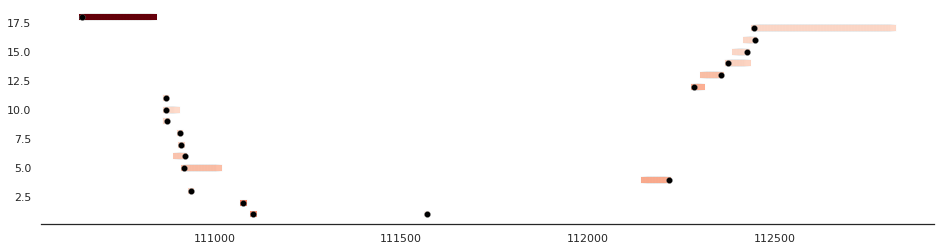

In [1321]:
from matplotlib import pyplot as plt
import seaborn as sns
#sns.set_theme(style="nogrid")
sns.set_style("white")

plt.figure(figsize=(16,4))
ax = sns.scatterplot(gene_bins_original, gene_index_list_y,marker='s', hue= hic_feq_list_c, palette='Reds',edgecolor='black', linewidth=0.01)
ax = sns.scatterplot(gene_start, gene_val,color='black',edgecolor='grey', linewidth=0.3)
#ax = sns.lineplot(gene_start, gene_val,color='black')
sns.despine(left=True)
ax.legend().remove()

/grid/gillis/home/lohia/.conda/envs/hicexplorer/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


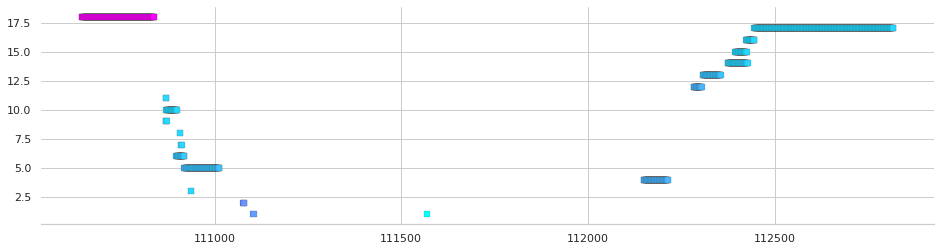

In [1312]:
from matplotlib import pyplot as plt
import seaborn as sns
#sns.set_theme(style="nogrid")
sns.set_style("whitegrid")
import matplotlib.ticker as ticker

plt.figure(figsize=(16,4))
ax = sns.scatterplot(gene_bins_original, gene_index_list_y,marker='s', hue= hic_feq_list_c, palette='cool',edgecolor='black', linewidth=0.1)
#ax = sns.scatterplot(gene_start, gene_val,color='black',edgecolor='grey', linewidth=0.3)
#ax = sns.lineplot(gene_start, gene_val,color='black')
sns.despine(left=True)
#ax.xaxis.set_major_locator(ticker.MultipleLocator(100))
#ax.xaxis.set_major_formatter(ticker.ScalarFormatter())
#ax.set_xlim([bin_start-1010, bin_start+1010])
ax.legend().remove()

In [1266]:
gene_bins_original

[105685,
 105686,
 105687,
 105808,
 105809,
 105810,
 105811,
 105812,
 105813,
 105814,
 105815,
 105816,
 105817,
 105818,
 105819,
 106140,
 106141,
 106142,
 106143,
 106144,
 106145,
 106146,
 106147,
 106148,
 106149,
 106150,
 106151,
 106152,
 106153,
 106154,
 106155,
 106156,
 106157,
 106158,
 106159,
 106160,
 106161,
 106162,
 106163,
 106164,
 106165,
 106166,
 106167,
 106168,
 106169,
 106170,
 106171,
 106172,
 106173,
 106174,
 106175,
 106176,
 106177,
 106178,
 106179,
 106180,
 106181,
 106182,
 106183,
 106184,
 106185,
 106186,
 106187,
 106188,
 104664,
 104665,
 104666,
 104641,
 104642,
 104643,
 104644,
 104645,
 104646,
 104647,
 104648,
 104649,
 104650,
 104651,
 104652,
 104653,
 104654,
 104655,
 104656,
 104657,
 104658,
 104659,
 104660,
 104661,
 104662,
 104663,
 104664,
 104665,
 104666,
 104667,
 104668,
 104669,
 104670,
 104671,
 104672,
 104673,
 104674,
 104675,
 104676,
 104677,
 104678,
 104679,
 104680,
 104681,
 104682,
 104683,
 104684,
 

In [1001]:
bin_start

111569

In [1031]:
gene_bins_original_x = [x*1000 for x in gene_bins_original]

In [1426]:
sns.set(style='white', font_scale=1.5)
plt.rc("axes.spines", top=False, right=False)
plt.rc('xtick', bottom=True)
plt.rc('ytick', left=True)
import joypy



/grid/gillis/home/lohia/.conda/envs/hicexplorer/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


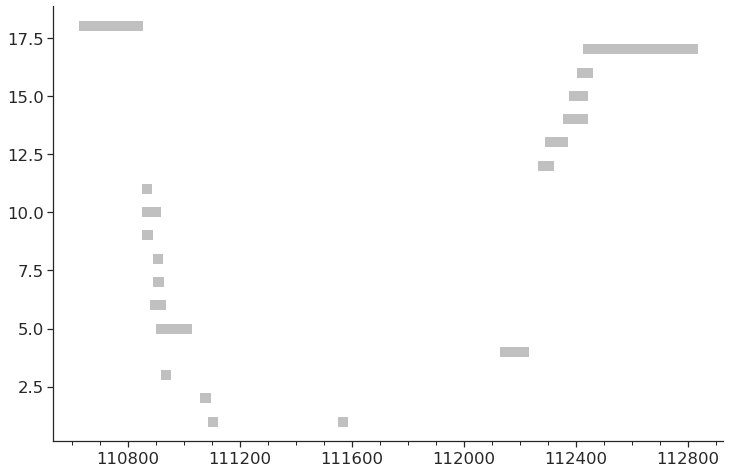

In [1460]:
from matplotlib import pyplot as plt
import seaborn as sns
#sns.set_theme(style="nogrid")
#sns.set_style("white")
import matplotlib.ticker as ticker

plt.figure(figsize=(12,8))
sns.set_style("ticks")

ax = sns.scatterplot(gene_bins_original, gene_index_list_y,marker='s',edgecolor='darkgrey', linewidth=0, s=100, color='silver')
#ax = sns.scatterplot(gene_bins_original, gene_index_list_y,marker='s', hue= hic_feq_list_c, palette='Greens',edgecolor='green', linewidth=0.0, s=100,hue_norm=(0,60))
#ax = sns.scatterplot(gene_bins_original, gene_index_list_y, hue= hic_feq_list_c, palette='Greens',edgecolor='green', linewidth=0.3, s=1.6, hue_norm=(-0,60))
#ax = sns.scatterplot(gene_start, gene_val,color='black',edgecolor='black', linewidth=1, marker='o', s=20)
#ax = sns.scatterplot(gene_start, gene_val,edgecolor='grey', linewidth=0.3, marker='s', s=10, hue_norm=(-0,60))
#ax = sns.lineplot(gene_start, gene_val,color='black')
sns.despine()
ax.xaxis.set_major_locator(ticker.MultipleLocator(400))
ax.xaxis.set_major_formatter(ticker.ScalarFormatter())
ax.xaxis.set_minor_locator(ticker.MultipleLocator(100))

#ax.set_xlim([bin_start-1000, bin_start])
ax.legend().remove()

plt.savefig('/grid/gillis/data/lohia/hi_c_data_processing/notebooks/figures/gtex_snp_example.pdf',
            transparent=True)


In [1448]:
gene_bins_original

[111104,
 111105,
 111077,
 111078,
 111079,
 111080,
 110936,
 110937,
 112149,
 112150,
 112151,
 112152,
 112153,
 112154,
 112155,
 112156,
 112157,
 112158,
 112159,
 112160,
 112161,
 112162,
 112163,
 112164,
 112165,
 112166,
 112167,
 112168,
 112169,
 112170,
 112171,
 112172,
 112173,
 112174,
 112175,
 112176,
 112177,
 112178,
 112179,
 112180,
 112181,
 112182,
 112183,
 112184,
 112185,
 112186,
 112187,
 112188,
 112189,
 112190,
 112191,
 112192,
 112193,
 112194,
 112195,
 112196,
 112197,
 112198,
 112199,
 112200,
 112201,
 112202,
 112203,
 112204,
 112205,
 112206,
 112207,
 112208,
 112209,
 112210,
 112211,
 112212,
 112213,
 112214,
 112215,
 110919,
 110920,
 110921,
 110922,
 110923,
 110924,
 110925,
 110926,
 110927,
 110928,
 110929,
 110930,
 110931,
 110932,
 110933,
 110934,
 110935,
 110936,
 110937,
 110938,
 110939,
 110940,
 110941,
 110942,
 110943,
 110944,
 110945,
 110946,
 110947,
 110948,
 110949,
 110950,
 110951,
 110952,
 110953,
 110954,
 

In [1437]:
gene_bins_original

[111104,
 111105,
 111077,
 111078,
 111079,
 111080,
 110936,
 110937,
 112149,
 112150,
 112151,
 112152,
 112153,
 112154,
 112155,
 112156,
 112157,
 112158,
 112159,
 112160,
 112161,
 112162,
 112163,
 112164,
 112165,
 112166,
 112167,
 112168,
 112169,
 112170,
 112171,
 112172,
 112173,
 112174,
 112175,
 112176,
 112177,
 112178,
 112179,
 112180,
 112181,
 112182,
 112183,
 112184,
 112185,
 112186,
 112187,
 112188,
 112189,
 112190,
 112191,
 112192,
 112193,
 112194,
 112195,
 112196,
 112197,
 112198,
 112199,
 112200,
 112201,
 112202,
 112203,
 112204,
 112205,
 112206,
 112207,
 112208,
 112209,
 112210,
 112211,
 112212,
 112213,
 112214,
 112215,
 110919,
 110920,
 110921,
 110922,
 110923,
 110924,
 110925,
 110926,
 110927,
 110928,
 110929,
 110930,
 110931,
 110932,
 110933,
 110934,
 110935,
 110936,
 110937,
 110938,
 110939,
 110940,
 110941,
 110942,
 110943,
 110944,
 110945,
 110946,
 110947,
 110948,
 110949,
 110950,
 110951,
 110952,
 110953,
 110954,
 

In [1293]:
hic_feq_list_c

[483.1274719238281,
 21.85869789123535,
 21.85869789123535,
 29.905290603637695,
 29.905290603637695,
 29.905290603637695,
 29.905290603637695,
 29.905290603637695,
 29.905290603637695,
 29.905290603637695,
 29.905290603637695,
 29.905290603637695,
 29.905290603637695,
 29.905290603637695,
 29.905290603637695,
 29.905290603637695,
 29.905290603637695,
 29.905290603637695,
 29.905290603637695,
 29.905290603637695,
 29.905290603637695,
 29.905290603637695,
 29.905290603637695,
 29.905290603637695,
 29.905290603637695,
 29.905290603637695,
 29.905290603637695,
 16.362384796142578,
 16.362384796142578,
 26.161724090576172,
 26.161724090576172,
 26.161724090576172,
 21.90846061706543,
 21.90846061706543,
 21.90846061706543,
 21.90846061706543,
 21.90846061706543,
 21.90846061706543,
 21.90846061706543,
 21.90846061706543,
 21.90846061706543,
 21.90846061706543,
 21.90846061706543,
 21.90846061706543,
 21.90846061706543,
 21.90846061706543,
 21.90846061706543,
 21.90846061706543,
 21.9084606

In [1203]:
gene_index_list_y

[1,
 1,
 2,
 2,
 2,
 2,
 3,
 3,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 7,
 7,
 7,
 8,
 8,
 9,
 9,
 9,
 9,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 11,
 11,
 11,
 12,
 12,
 12,
 12,
 12,
 12,
 

In [1202]:
gene_bins_original

[111104,
 111105,
 111077,
 111078,
 111079,
 111080,
 110936,
 110937,
 112149,
 112150,
 112151,
 112152,
 112153,
 112154,
 112155,
 112156,
 112157,
 112158,
 112159,
 112160,
 112161,
 112162,
 112163,
 112164,
 112165,
 112166,
 112167,
 112168,
 112169,
 112170,
 112171,
 112172,
 112173,
 112174,
 112175,
 112176,
 112177,
 112178,
 112179,
 112180,
 112181,
 112182,
 112183,
 112184,
 112185,
 112186,
 112187,
 112188,
 112189,
 112190,
 112191,
 112192,
 112193,
 112194,
 112195,
 112196,
 112197,
 112198,
 112199,
 112200,
 112201,
 112202,
 112203,
 112204,
 112205,
 112206,
 112207,
 112208,
 112209,
 112210,
 112211,
 112212,
 112213,
 112214,
 112215,
 110919,
 110920,
 110921,
 110922,
 110923,
 110924,
 110925,
 110926,
 110927,
 110928,
 110929,
 110930,
 110931,
 110932,
 110933,
 110934,
 110935,
 110936,
 110937,
 110938,
 110939,
 110940,
 110941,
 110942,
 110943,
 110944,
 110945,
 110946,
 110947,
 110948,
 110949,
 110950,
 110951,
 110952,
 110953,
 110954,
 

In [1054]:
tss_dist_l

[565282, 798985, 801169, 851161, 851434, 897970]

In [1047]:
given_gene_id

[]

In [1024]:
gene_start

[38690, 38456, 38453, 38403, 38403, 38356, 39254]

In [907]:
gene_start_val = [-1 for x in gene_start]

In [887]:
gene_data[['gene_id', 'gene_name']]

gene_id   gene_name
0        ENSG00000278704  BX004987.1
8        ENSG00000277400  AC145212.1
20       ENSG00000274847       MAFIP
34       ENSG00000278198  AC011043.2
48       ENSG00000277428     RF00019
...                  ...         ...
2939635  ENSG00000237801  AJ271735.3
2939638  ENSG00000228410  AJ271736.8
2939641  ENSG00000223484  AJ271736.3
2939644  ENSG00000185203  AJ271736.5
2939648  ENSG00000227159    DDX11L16

[64485 rows x 2 columns]

In [692]:
hic_file_whole.matrix[bin_start, :][:, g_s : g_e].toarray().tolist()[0]

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0]

In [685]:
entire_matrix_KR[variant_bins,:][:, gene_bins].toarray() 

array([[  0.      ,   0.      , 110.274765,   0.      ,   0.      ,
          0.      ]], dtype=float32)

In [639]:
gene_bins

[615, 617, 616, 619, 620, 624]

In [584]:
bin_start

39254

In [645]:
gene_start


[38356, 38403, 38383, 38452, 38453, 38640]

In [664]:
gene_start

[38356, 38403, 38403, 38456, 38453, 38690]

In [583]:
hic_dist

[897970, 851161, 851434, 798985, 801169, 565282, 0]

In [578]:
hic_freq = entire_matrix_KR[variant_bins,:][:, gene_bins].toarray()[0].tolist()
hic_dist = df_unique_variants_all[df_unique_variants_all['variant_id']==var_int]['tss_distance'].tolist()

/grid/gillis/home/lohia/.conda/envs/hicexplorer/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

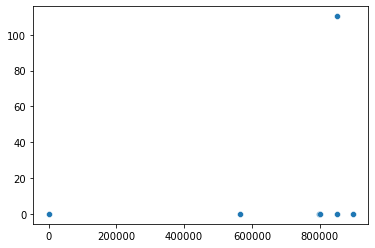

In [579]:
hic_dist.append(0)
hic_freq.append(0)

sns.scatterplot(hic_dist, hic_freq)

In [472]:
hic_file.cut_intervals[0]

('chr10', 14, 17, b'ENSG00000260370')

In [516]:
gene_bins_original

[110207, 110290, 110207]

In [517]:
bin_start

111116

In [585]:
bin_start_whole = bin_start - 1000
bin_end_whole = bin_start + 1000

In [586]:
entire_matrix_KR_whole = hic_file_whole.matrix[bin_start, :][:, bin_start_whole : bin_end_whole]

In [587]:
array_list = entire_matrix_KR_whole.toarray()[0].tolist()

In [592]:
range_list = list(range(bin_start_whole,bin_end_whole))

In [600]:
array_list_dist = [y if x in gene_bins_original else 0 if x==bin_start else -20 for x,y in zip(range_list, array_list )]



In [670]:
array_list_dist = [y  for x,y in zip(range_list, array_list ) if x in gene_bins_original]



In [672]:
array_range_dist = [x  for x,y in zip(range_list, array_list ) if x in gene_bins_original]


In [665]:
array_list_dist_start = [-15 if x in gene_start else 0 if x==bin_start else -20 for x,y in zip(range_list, array_list ) ]


In [594]:
array_list_dist_genes = [y if x in gene_bins_original else 0 for x,y in zip(range_list, array_list ) ]

/grid/gillis/home/lohia/.conda/envs/hicexplorer/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

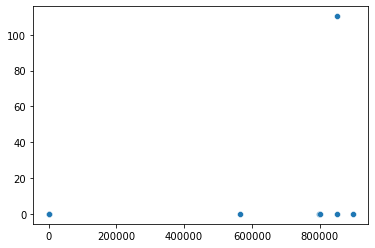

In [595]:
hic_dist.append(0)
hic_freq.append(0)

sns.scatterplot(hic_dist, hic_freq)

In [615]:
entire_matrix_KR_whole.toarray()

array([[0., 0., 0., ..., 0., 0., 0.]])

/grid/gillis/home/lohia/.conda/envs/hicexplorer/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

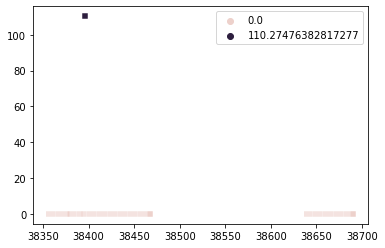

In [684]:
sns.scatterplot(array_range_dist, array_list_dist,marker='s', hue= array_list_dist,alpha=1)

/grid/gillis/home/lohia/.conda/envs/hicexplorer/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/grid/gillis/home/lohia/.conda/envs/hicexplorer/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

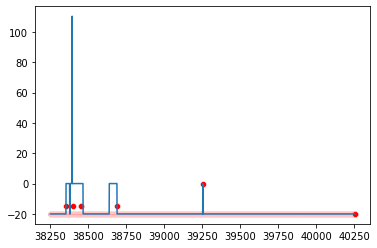

In [669]:
sns.lineplot(range_list, array_list_dist)
sns.scatterplot(range_list, array_list_dist_start,color='r')

/grid/gillis/home/lohia/.conda/envs/hicexplorer/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

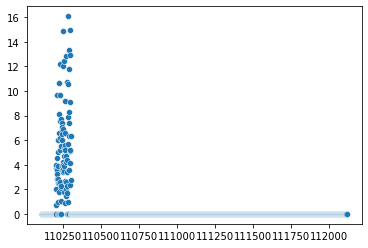

In [507]:
sns.scatterplot(range_list, array_list_dist_genes)

/grid/gillis/home/lohia/.conda/envs/hicexplorer/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

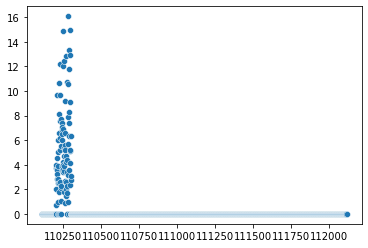

In [524]:
sns.scatterplot(range_list, array_list_dist_genes)

In [363]:
jac_sim_path = '/grid/gillis/data/lohia/hi_c_data_processing/data_human/aggregates/500kbp_raw/max/hic_gene_gw_KR_KR.h5'
exp_file_path = '/grid/gillis/data/lohia/hi_c_data_processing/software/CoCoCoNet/networks/human_prioAggNet.h5'
exp_file = hm.hiCMatrix(exp_file_path)


In [430]:
        # 
        exp_file = hm.hiCMatrix(exp_file_path)

        #calc_auc(exp_file, jac_sim, args.outfile, args.auc_type, given_top_percentile=int(args.given_top_percentile), jac_sim_species=args.jac_sim_species, exp_file_species=args.exp_file_species, ortho_genes=args.ortho_genes)


In [399]:
jac_sim = hm.hiCMatrix(jac_sim_path)

In [431]:
        exp_genes_all = [x[3].decode() for x in exp_file.cut_intervals]
        exp_matrix = exp_file.matrix
        
        
        all_genes_all = [x[3].decode() for x in jac_sim.cut_intervals]
        
        #entire_matrix = jac_sim.matrix
        #entire_matrix = entire_matrix.astype('float32')

In [432]:
            subset_genes_exp_file = list (set(all_genes_all) & set(exp_genes_all))
            subset_genes_jac_sim  = list (set(all_genes_all) & set(exp_genes_all))

In [367]:
len(subset_genes_jac_sim)

23465

In [368]:
len(subset_genes_exp_file)

23465

In [433]:
        exp_genes_index_list = [i for i, value in enumerate(exp_genes_all) if value in subset_genes_exp_file]
        exp_genes = [value for i, value in enumerate(exp_genes_all) if value in subset_genes_exp_file]
        exp_matrix  = csr_matrix(exp_matrix)[exp_genes_index_list, :][:, exp_genes_index_list]
        
        updated_cut_intervals = [exp_file.cut_intervals[x] for x in exp_genes_index_list]
        exp_file.update_matrix(exp_matrix,  updated_cut_intervals)
   
        exp_matrix = exp_matrix.toarray()

In [372]:
import h5py
import logging
import numpy as np
import pandas as pd
from hicmatrix import HiCMatrix as hm
from hicmatrix.lib import MatrixFileHandler
from scipy.sparse import csr_matrix, dia_matrix, triu, tril, coo_matrix
import scipy.stats as stats
import os.path


In [434]:
        rank_abs = lambda x: stats.rankdata(x, method='ordinal')
        exp_matrix = np.apply_along_axis(rank_abs, 1, exp_matrix)
        
        exp_matrix = exp_matrix * 1.0
        
        #exp_matrix = exp_matrix.astype('float32')
        
        
        
        
        chr_list_2 = exp_file.getChrNames()

In [405]:
exp_matrix.min()

1.0

In [406]:
exp_matrix.max()

23465.0

In [407]:
exp_matrix.shape

(23465, 23465)

In [453]:
23465 - 235

23230

In [408]:
a = np.arange(10)

In [443]:
exp_matrix

array([[23465., 11426., 16226., ..., 22574., 12837., 22862.],
       [19305., 23465., 23464., ..., 23312.,  5265., 17825.],
       [18237., 23394., 23465., ..., 23441.,  9323., 21182.],
       ...,
       [13818.,  9501., 18676., ..., 23465., 16572., 22040.],
       [ 4472.,   429.,  1632., ..., 14286., 23465., 21590.],
       [11343.,  1802.,  7354., ..., 20079., 21260., 23465.]])

In [454]:
a = np.where(exp_matrix > 23230, 1, 0)

In [445]:
set(a.sum(axis=1).tolist())

{101}

In [455]:
            for chrom in chr_list_2:

                start, end = exp_file.getChrBinRange(chrom)
                
                a[start: end, start: end] = 0

In [388]:
np.fill_diagonal(exp_matrix, 0)

In [456]:
no_of_intra = a.sum(axis=1).tolist()

In [459]:
fraction_of_intra = [x/234 for x in no_of_intra]

<AxesSubplot:ylabel='Count'>

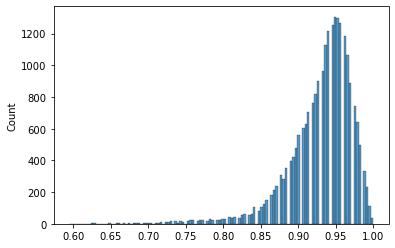

In [460]:
sns.histplot(fraction_of_intra)

In [461]:
min(fraction_of_intra)

0.594017094017094

In [462]:
max(fraction_of_intra)

1.0

In [ ]:
mean

In [ ]:
import h5py
import logging
import numpy as np
import pandas as pd
from hicmatrix import HiCMatrix as hm
from hicmatrix.lib import MatrixFileHandler
from scipy.sparse import csr_matrix, dia_matrix, triu, tril, coo_matrix
import scipy.stats as stats
import os.path

    
def calc_auc(exp_file, jac_sim, outfile, auc_type, given_top_percentile=1 ,jac_sim_species='a', exp_file_species='a', ortho_genes="ortho_genes"):
    

        
        
    
        if jac_sim_species != exp_file_species:
            df_1_1 = pd.read_csv(ortho_genes)
            df_1_1 = df_1_1.drop_duplicates(subset=[jac_sim_species], keep=False)
            df_1_1 = df_1_1.drop_duplicates(subset=[exp_file_species], keep=False)
            jac_sim_species_ortho_subset = list (set(all_genes_all) & set(df_1_1[jac_sim_species].tolist()))
            df_1_1 = df_1_1[df_1_1[jac_sim_species].isin(jac_sim_species_ortho_subset)]
            exp_file_species_ortho_subset = list (set(exp_genes_all) & set(df_1_1[exp_file_species].tolist()))
            df_1_1 = df_1_1[df_1_1[exp_file_species].isin(exp_file_species_ortho_subset)]
            subset_genes_exp_file = df_1_1[exp_file_species].tolist()
            subset_genes_jac_sim = df_1_1[jac_sim_species].tolist()
            
        else:
            subset_genes_exp_file = list (set(all_genes_all) & set(exp_genes_all))
            subset_genes_jac_sim  = list (set(all_genes_all) & set(exp_genes_all))
            
        exp_genes_index_list = [i for i, value in enumerate(exp_genes_all) if value in subset_genes_exp_file]
        exp_genes = [value for i, value in enumerate(exp_genes_all) if value in subset_genes_exp_file]
        exp_matrix  = csr_matrix(exp_matrix)[exp_genes_index_list, :][:, exp_genes_index_list]
        
        updated_cut_intervals = [exp_file.cut_intervals[x] for x in exp_genes_index_list]
        exp_file.update_matrix(exp_matrix,  updated_cut_intervals)
   
        exp_matrix = exp_matrix.toarray()
    
        

        rank_abs = lambda x: stats.rankdata(x, method='ordinal')
        exp_matrix = np.apply_along_axis(rank_abs, 1, exp_matrix)
        
        exp_matrix = exp_matrix * 1.0
        
        exp_matrix = exp_matrix.astype('float32')
        
        
        
        
        chr_list_2 = exp_file.getChrNames()

        
        all_gene_index_list = [i for i, value in enumerate(all_genes_all) if value in subset_genes_jac_sim]
        all_genes = [value for i, value in enumerate(all_genes_all) if value in subset_genes_jac_sim]
        
        entire_matrix  = csr_matrix(entire_matrix)[all_gene_index_list, :][:, all_gene_index_list]
        
        updated_cut_intervals = [jac_sim.cut_intervals[x] for x in all_gene_index_list]
        jac_sim.update_matrix(entire_matrix, updated_cut_intervals)
        
        entire_matrix = entire_matrix.toarray()
        entire_matrix = entire_matrix.astype('float32')
        
        
        
        chr_list_1 = jac_sim.getChrNames()

        max_value = entire_matrix.max() + 1 + exp_matrix.max()
        max_value = max_value.astype('float32')

        if auc_type == 'inter_only':
        
            for chrom in chr_list_1:

                start, end = jac_sim.getChrBinRange(chrom)
                
                entire_matrix[start: end, start: end] = max_value 
                
            for chrom in chr_list_2:

                start, end = exp_file.getChrBinRange(chrom)
                
                exp_matrix[start: end, start: end] = max_value 
                
        elif auc_type == 'inter_one_sided':
        
            for chrom in chr_list_1:

                start, end = jac_sim.getChrBinRange(chrom)
                
                entire_matrix[start: end, start: end] = max_value 
                
        
        elif auc_type == 'intra_only':

            coordinate_matrix = np.zeros(entire_matrix.shape,  dtype='float32')
            for chrom in chr_list_1:

                start, end = jac_sim.getChrBinRange(chrom)
                
                coordinate_matrix[start: end, start: end] = max_value
                
            inter_coodinates = np.where(coordinate_matrix != max_value)
            x_inter = inter_coodinates[0].tolist()
            y_inter = inter_coodinates[1].tolist()
            
            entire_matrix[x_inter, y_inter] = max_value
            np.fill_diagonal(entire_matrix , max_value)
            #entire_matrix.setdiag(max_value, k=0)
            
            
            coordinate_matrix = np.zeros(exp_matrix.shape,  dtype='float32')
            for chrom in chr_list_2:

                start, end = exp_file.getChrBinRange(chrom)
                
                coordinate_matrix[start: end, start: end] = max_value
                
            inter_coodinates = np.where(coordinate_matrix != max_value)
            x_inter = inter_coodinates[0].tolist()
            y_inter = inter_coodinates[1].tolist()
            exp_matrix[x_inter, y_inter] = max_value
            np.fill_diagonal(exp_matrix , max_value)
            #exp_matrix.setdiag(max_value, k=0)


        else:

            np.fill_diagonal(entire_matrix , max_value)

            np.fill_diagonal(exp_matrix , max_value)
            #exp_matrix.setdiag(max_value, k=0)
            #entire_matrix.setdiag(max_value, k=0)


        df_jac = pd.DataFrame(entire_matrix ,  index=all_genes, columns = all_genes)
        df_exp = pd.DataFrame(exp_matrix ,  index=exp_genes, columns = exp_genes)

        if jac_sim_species != exp_file_species:
            df_1_1 = pd.read_csv(ortho_genes)
            df_1_1 = df_1_1.drop_duplicates(subset=[jac_sim_species], keep=False)
            df_1_1 = df_1_1.drop_duplicates(subset=[exp_file_species], keep=False)
            jac_sim_species_ortho_subset = list (set(all_genes) & set(df_1_1[jac_sim_species].tolist()))
            df_1_1 = df_1_1[df_1_1[jac_sim_species].isin(jac_sim_species_ortho_subset)]
            exp_file_species_ortho_subset = list (set(exp_genes) & set(df_1_1[exp_file_species].tolist()))
            df_1_1 = df_1_1[df_1_1[exp_file_species].isin(exp_file_species_ortho_subset)]
            subset_genes_exp_file = df_1_1[exp_file_species].tolist()
            subset_genes_jac_sim = df_1_1[jac_sim_species].tolist()
            df_exp_subset = df_exp.loc[subset_genes_exp_file, subset_genes_exp_file]
            df_jac_subset = df_jac.loc[subset_genes_jac_sim, subset_genes_jac_sim]
            
        else:
            subset_genes_exp_file = list (set(all_genes) & set(exp_genes))
            subset_genes_jac_sim  = list (set(all_genes) & set(exp_genes))
            df_exp_subset = df_exp.loc[subset_genes_exp_file, subset_genes_exp_file]
            df_jac_subset = df_jac.loc[subset_genes_jac_sim, subset_genes_jac_sim]


        coodinates_1 = np.where(df_jac_subset == max_value)
        coodinates_2 = np.where(df_exp_subset == max_value)

        x_coo = coodinates_1[0].tolist() + coodinates_2[0].tolist()
        y_coo = coodinates_1[1].tolist() + coodinates_2[1].tolist()

        df_jac_subset.to_numpy()[x_coo, y_coo] = max_value
        df_exp_subset.to_numpy()[x_coo, y_coo] = np.nan

            
        rank_abs = lambda x: stats.rankdata(x)
        predicts2 = np.apply_along_axis(rank_abs, 1, df_jac_subset)
        predicts2 = predicts2.astype('float')
        
        predicts2[x_coo, y_coo] = np.nan
        
        top_percentile = 100 - given_top_percentile
                
        exp_upper = lambda x: np.where(x < np.percentile(x[~np.isnan(x)] , top_percentile), 0, 1.0) if x[~np.isnan(x)].shape[0] > 0 else np.zeros(x.shape[0])
        tp = np.apply_along_axis(exp_upper, 1, df_exp_subset)
        tp[x_coo, y_coo] = np.nan
        exp_upper = lambda x: np.where(x >= np.percentile(x[~np.isnan(x)] , top_percentile), 0, 1.0) if x[~np.isnan(x)].shape[0] > 0 else np.zeros(x.shape[0])
        tn = np.apply_along_axis(exp_upper, 1, df_exp_subset)
        tn[x_coo, y_coo] = np.nan
        pos_rank_sum = tp * predicts2
        auc_array = (((np.nansum(pos_rank_sum, axis=1) / (np.nansum(tp, axis=1)) )- (np.nansum(tp, axis=1) + 1)/2)) / np.nansum(tn, axis=1)
        
        df = pd.DataFrame(columns = ['gene_id_jac_sim', 'chrom_jac_sim', 'gene_id_exp_file', 'chrom_exp_file', 'auc'])  
        df['auc'] = auc_array.tolist()
        df['gene_id_exp_file'] = subset_genes_exp_file
        df['gene_id_jac_sim'] = subset_genes_jac_sim
        
        gene_list = [x[3].decode() for x in jac_sim.cut_intervals]
        _chrom_list = [x[0] for x in jac_sim.cut_intervals]
        df['chrom_jac_sim'] = [_chrom_list[gene_list.index(x)] for x in df['gene_id_jac_sim']]

        gene_list = [x[3].decode() for x in exp_file.cut_intervals]
        _chrom_list = [x[0] for x in exp_file.cut_intervals]
        df['chrom_exp_file'] = [_chrom_list[gene_list.index(x)] for x in df['gene_id_exp_file']]
        df.to_csv(outfile, sep='\t', index=False)
        
        
if __name__ == '__main__':

    
    import argparse
    parser = argparse.ArgumentParser()

    parser.add_argument('--outfile', default='tss',
                            help='tss or tss_max')
    parser.add_argument('--exp_file_path', default='tss',
                            help='tss or tss_max')
    parser.add_argument('--jac_sim_path', default='tss',
                            help='tss or tss_max')
    parser.add_argument('--auc_type', default='intra_only',
                            help='tss or tss_max')
    parser.add_argument('--jac_sim_species', default='a',
                            help='tss or tss_max')
    parser.add_argument('--exp_file_species', default='a',
                            help='tss or tss_max')
    parser.add_argument('--ortho_genes', default='b',
                            help='tss or tss_max')
    parser.add_argument('--given_top_percentile', default=1,
                            help='tss or tss_max')
    


    args = parser.parse_args()
    

    
        jac_sim = hm.hiCMatrix(args.jac_sim_path)
        exp_file = hm.hiCMatrix(args.exp_file_path)

        calc_auc(exp_file, jac_sim, args.outfile, args.auc_type, given_top_percentile=int(args.given_top_percentile), jac_sim_species=args.jac_sim_species, exp_file_species=args.exp_file_species, ortho_genes=args.ortho_genes)


In [5]:

    proj_list_file = pd.read_csv('/grid/gillis/data/nfox/hi_c_data_processing/data_human/stats/project_network_counts.txt', sep=' ', names=['proj', 'count'])
    
    counter = 0
    for resolution in [500, 250, 100, 40, 25, 10]:
        d2_list = []
        for proj in proj_list_file['proj'].tolist():
            file_name = f'/grid/gillis/data/lohia/hi_c_data_processing/data_human/{proj}/{resolution}kbp_raw/inter_none.h5'
        
            hic = hm.hiCMatrix(file_name)
            
            d2_list.append((hic.matrix.count_nonzero() / np.prod(hic.matrix.shape)))
            #print (counter)
        data_tuples = list(zip(proj_list_file['proj'].tolist(),d2_list))
        df = pd.DataFrame(data_tuples, columns=['proj_id','density'])
        df.to_csv(f'/grid/gillis/data/lohia/hi_c_data_processing/data_human/stats/project_density_inter_{resolution}.csv', index=False)
            
            
            

In [306]:
import pyranges as pr
chr_list=['chr' + str(x) for x in range(1,23)]
genome_info_file='/grid/gillis/data//lohia/hi_c_data_processing/genomes_jlee/gencode.v28.chr_patch_hapl_scaff.annotation.gtf.gz'
species='human'
from scipy.sparse import csr_matrix, dia_matrix, triu, tril, coo_matrix
import scipy.sparse as ss

    # as PyRanges-object
    gr = pr.read_gtf(genome_info_file)
    df = gr.df
    gene_data = df[df['Feature'] == 'gene']
    gene_data['gene_id'] = [x.split('.')[0] for x in gene_data['gene_id']]
    gene_data['gene_id'].drop_duplicates(inplace=True)
    

    


    if species != 'human':
        gene_data['Chromosome'] = ['chr'+x for x in gene_data['Chromosome']]
        
    new = gene_data["Chromosome"].isin(chr_list)
  

    gene_data = gene_data[new]
    gene_data.sort_values(by=['Chromosome', 'Start'], inplace=True)
            
    gene_data = gene_data[gene_data['Chromosome'].isin(chr_list)] 

    gene_data_grouped_chromosome = gene_data.groupby('Chromosome')